In [1]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

from test_model import test_model
from train_model import train_model

%matplotlib inline

In [2]:
if torch.cuda.is_available():
    device = "cuda:0"
elif torch.backends.mps.is_built():
    device = torch.device("mps")
else:
    device = "cpu"

In [3]:
data_dir = "tiny-imagenet-200/"
num_workers = {"train": 2, "val": 0, "test": 0}
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
}
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val"]}
dataloaders = {
    x: data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val"]
}

In [4]:
# Load Resnet18
torch.manual_seed(42)
model_ft = models.resnet18()
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

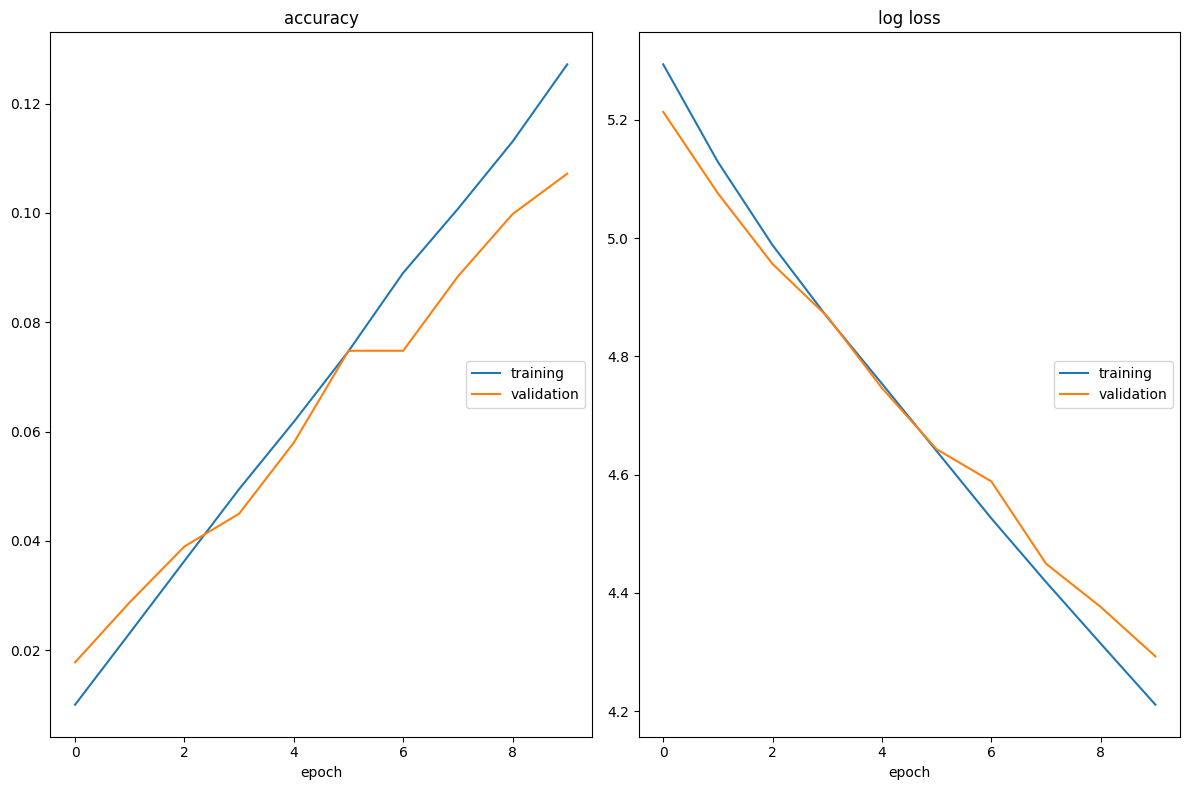

accuracy
	training         	 (min:    0.010, max:    0.127, cur:    0.127)
	validation       	 (min:    0.018, max:    0.107, cur:    0.107)
log loss
	training         	 (min:    4.211, max:    5.294, cur:    4.211)
	validation       	 (min:    4.293, max:    5.214, cur:    4.293)
Training complete in 6m 40s
Best Validation Accuracy: 0.10719999670982361, Epoch: 10


10

In [5]:
# Train
train_model(
    output_path="ResNet18_64_not_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [6]:
# Load Resnet18
model_ft = models.resnet18(weights="IMAGENET1K_V1")
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

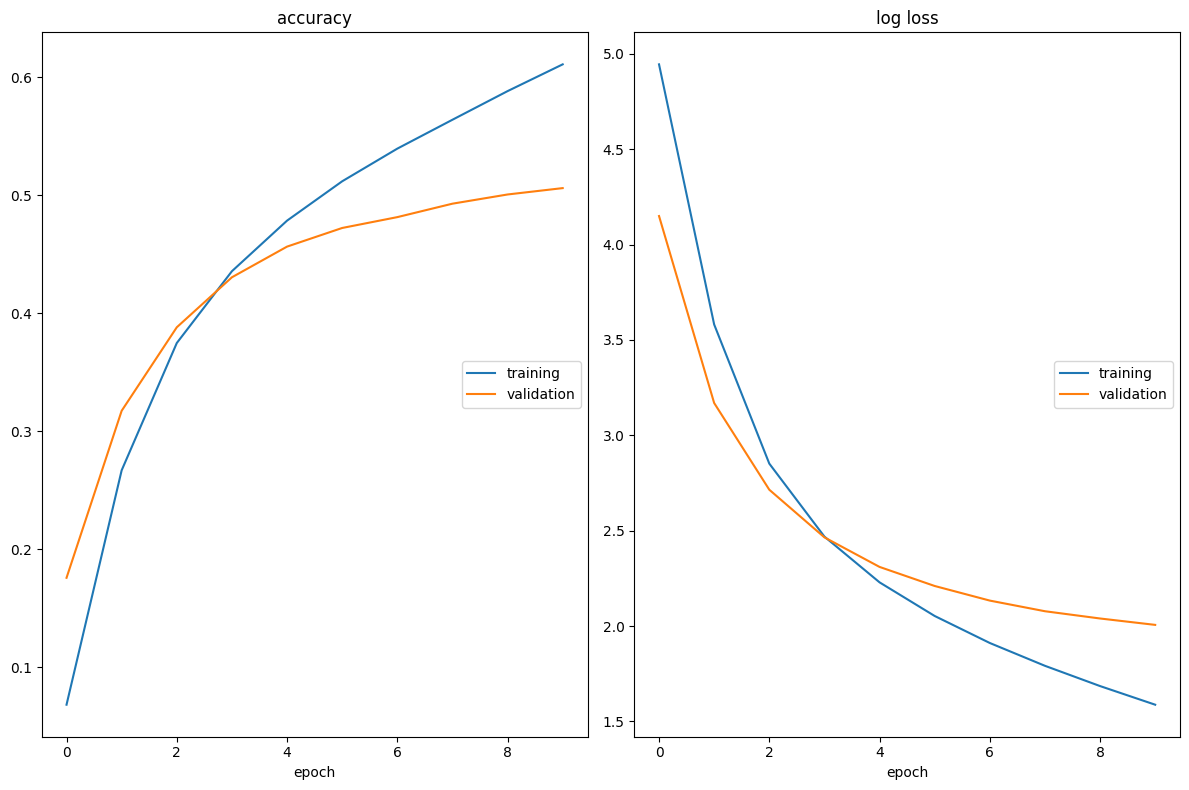

accuracy
	training         	 (min:    0.068, max:    0.611, cur:    0.611)
	validation       	 (min:    0.176, max:    0.506, cur:    0.506)
log loss
	training         	 (min:    1.588, max:    4.945, cur:    1.588)
	validation       	 (min:    2.006, max:    4.150, cur:    2.006)
Training complete in 6m 15s
Best Validation Accuracy: 0.5062000155448914, Epoch: 10


10

In [7]:
# Train
train_model(
    output_path="ResNet18_64_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [8]:
# Normalized Dataset
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
}
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}

In [9]:
# Load Resnet18
model_ft = models.resnet18(weights="IMAGENET1K_V1")
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

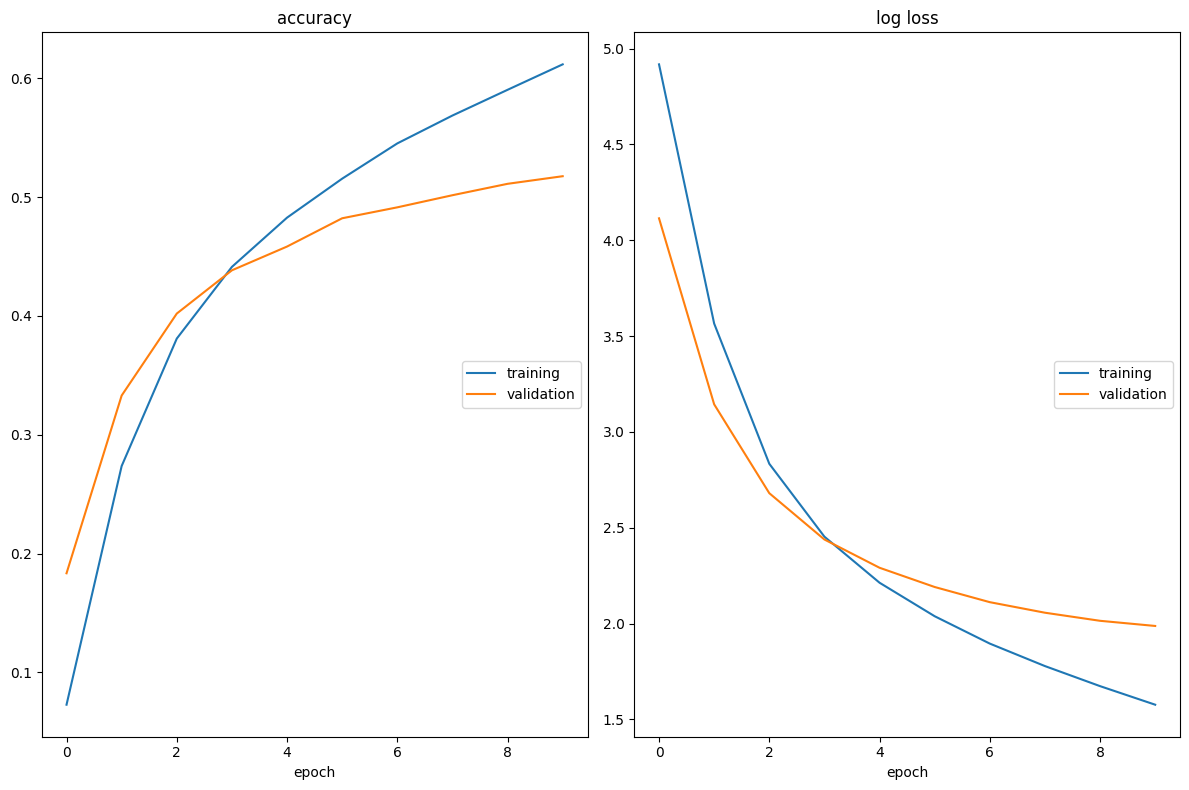

accuracy
	training         	 (min:    0.073, max:    0.612, cur:    0.612)
	validation       	 (min:    0.183, max:    0.518, cur:    0.518)
log loss
	training         	 (min:    1.577, max:    4.918, cur:    1.577)
	validation       	 (min:    1.988, max:    4.115, cur:    1.988)
Training complete in 6m 15s
Best Validation Accuracy: 0.5175999999046326, Epoch: 10


10

In [10]:
# Train
train_model(
    output_path="ResNet18_64_pretrained_normalized",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [11]:
# Normalized & Flipped Dataset
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomHorizontalFlip(0.5),
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
}
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}

In [12]:
# Load Resnet18
model_ft = models.resnet18(weights="IMAGENET1K_V1")
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

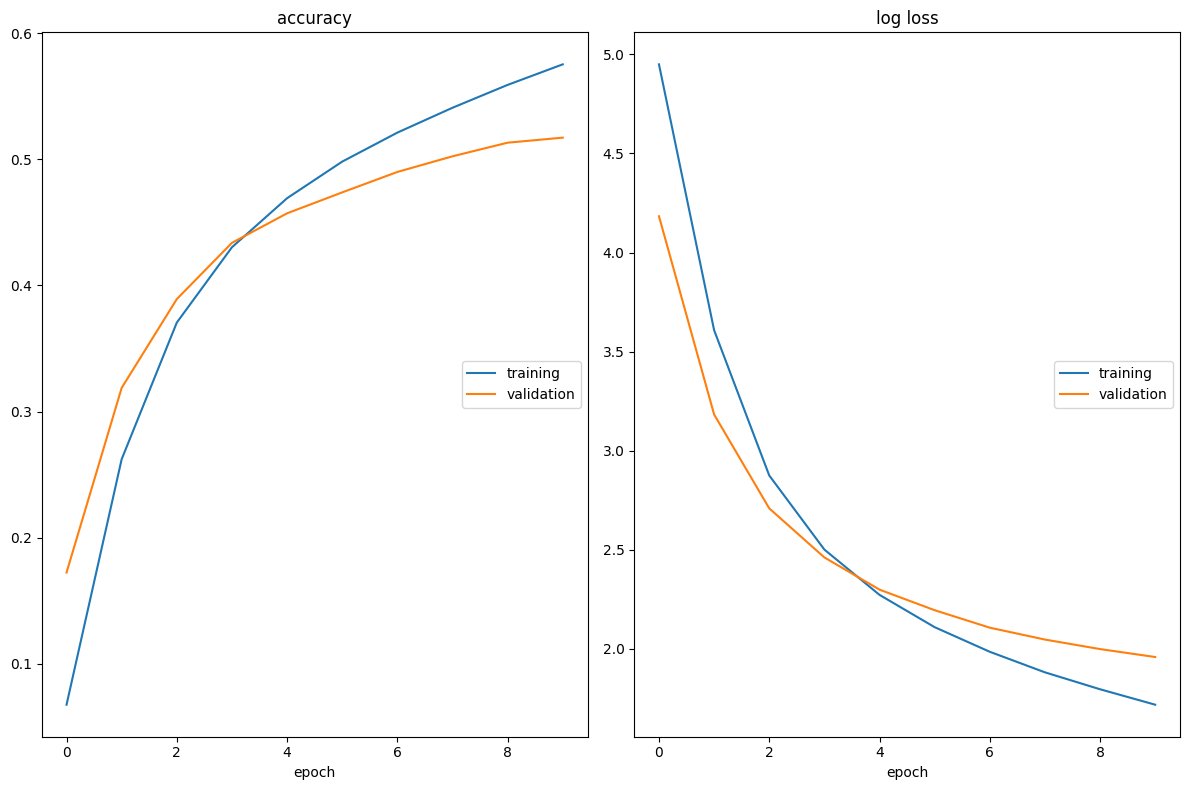

accuracy
	training         	 (min:    0.068, max:    0.575, cur:    0.575)
	validation       	 (min:    0.172, max:    0.517, cur:    0.517)
log loss
	training         	 (min:    1.719, max:    4.949, cur:    1.719)
	validation       	 (min:    1.959, max:    4.183, cur:    1.959)
Training complete in 6m 10s
Best Validation Accuracy: 0.5171999931335449, Epoch: 10


10

In [13]:
# Train
train_model(
    output_path="ResNet18_64_pretrained_normalized_flipped",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [14]:
# Normalized & Rotated Dataset
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomRotation(20),
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
}
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}

In [15]:
# Load Resnet18
model_ft = models.resnet18(weights="IMAGENET1K_V1")
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

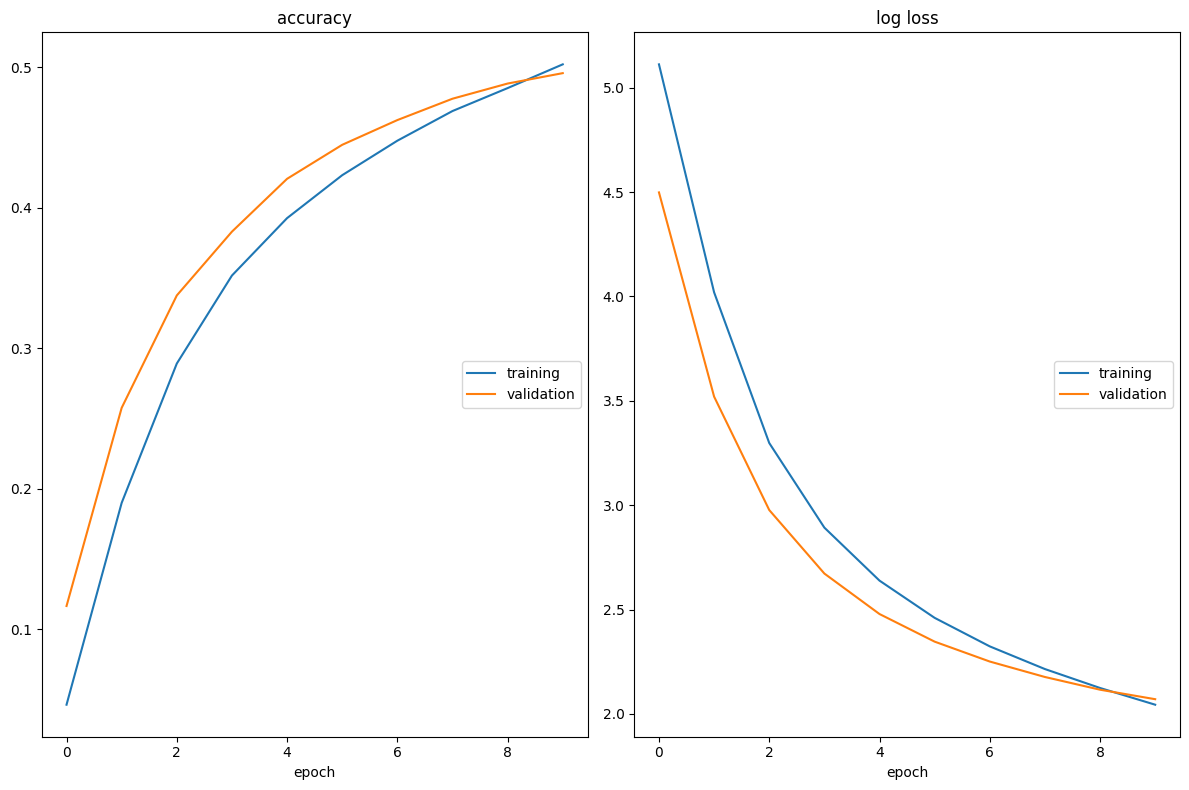

accuracy
	training         	 (min:    0.046, max:    0.502, cur:    0.502)
	validation       	 (min:    0.117, max:    0.496, cur:    0.496)
log loss
	training         	 (min:    2.044, max:    5.112, cur:    2.044)
	validation       	 (min:    2.071, max:    4.499, cur:    2.071)
Training complete in 6m 22s
Best Validation Accuracy: 0.4957999885082245, Epoch: 10


10

In [16]:
train_model(
    output_path="ResNet18_64_pretrained_normalized_rotated",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [17]:
# Normalized & Rotated & Flipped Dataset
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomRotation(20),
            transforms.RandomHorizontalFlip(0.5),
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
        ]
    ),
}
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}

In [18]:
# Load Resnet18
model_ft = models.resnet18(weights="IMAGENET1K_V1")
# Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, 200)
model_ft = model_ft.to(device)
# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

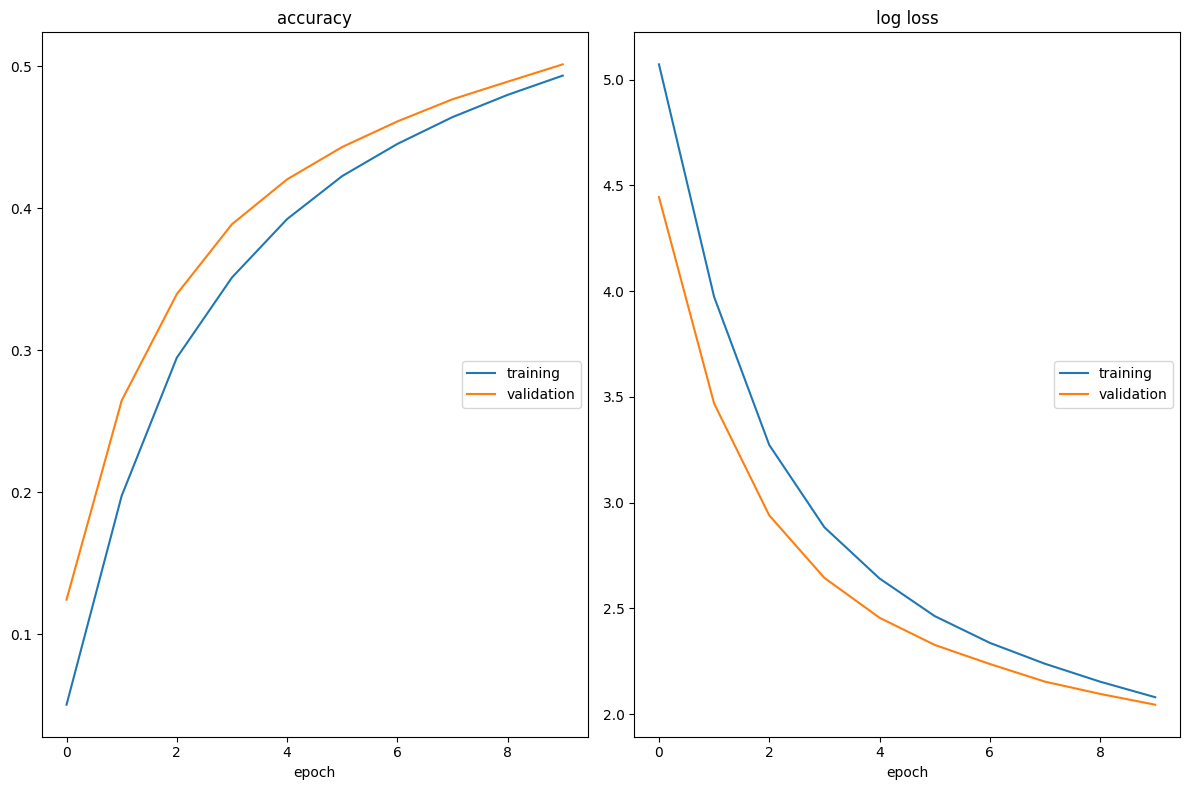

accuracy
	training         	 (min:    0.050, max:    0.493, cur:    0.493)
	validation       	 (min:    0.124, max:    0.501, cur:    0.501)
log loss
	training         	 (min:    2.081, max:    5.072, cur:    2.081)
	validation       	 (min:    2.045, max:    4.445, cur:    2.045)
Training complete in 6m 12s
Best Validation Accuracy: 0.5012000203132629, Epoch: 10


In [19]:
# Train
best_epoch = train_model(
    output_path="ResNet18_64_pretrained_normalized_flipped_rotated",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=10,
)

In [21]:
# Test
model_ft.load_state_dict(
    torch.load(f"models/ResNet18_64_pretrained_normalized_flipped_rotated/model_{best_epoch}_epoch.pt")
)
test_model(model=model_ft, dataloaders=dataloaders, criterion=criterion, device=device)

Iteration: 10/10, Loss: 1019.2914009094238.Test Loss: 2.0974 Acc: 0.4980
Test complete in 0m 2s
